# AST 4930 Homework Assignment #3 (10 pts)

## All work is due Tuesday September 26 at 5 pm.

## Instruction: 
Do all homework in this Jupyter notebook and submit your final .ipynb file via Canvas. Show ALL your work and try to add comment lines as needed to describe what your code does. 

You are encouraged to discuss homework problems with your classmates. However, your python script and answers to the questions must be written by yourself.

It's fine if you use someone else's code you found on Internet, but make sure you write down the source. You don't have to cite me when you use anything from AST4930 Notebook.

It's a common sense but just to make sure, when you make a figure make sure they are readable/understandable. If you cannot see the title, labels, data points, or if you don't understand the point of the figure, I won't probably be able to see/understand them either.

change for github


## 1. Curse of dimensionality (4 pts)

We learned that kNN suffers from the curse of dimensionality. In class, we estimated the size of a hypercube that includes $k$ nearest neighbors as a function of dimension and number of data points. In this homework, let's look into this problem in a more quantitative way by following the steps below. 

(a) Make six $D$-dimensional numpy arrays, where we adopt $D = 1, 2, 5, 10, 100,$ and $1000$, each of which contains $n=10^4$ data points that are randomly distributed in the $D$-dimensional space (hint: use np.random.rand). Let's assume that the side of each hypercube ranges from 0 to 1, so the volume of hypercubes is 1. (1 pt)


In [20]:
import numpy as np
 
n = 10000
arr1d = np.random.rand(n,1)

In [21]:
arr1d

array([[0.47333684],
       [0.57880585],
       [0.80877329],
       ...,
       [0.60027508],
       [0.39183008],
       [0.88069705]])

In [22]:
arr1d.shape

(10000, 1)

In [27]:
import numpy as np
n = 10000
arr1d = np.random.rand(n, 1)
arr2d = np.random.rand(n, 2)
arr5d = np.random.rand(n, 5)
arr10d = np.random.rand(n, 10)
arr100d = np.random.rand(n, 100)
arr1000d = np.random.rand(n, 1000)
print(arr1d.shape)
print(arr2d.shape)
print(arr5d.shape)
print(arr10d.shape)
print(arr100d.shape)
print(arr1000d.shape)







(10000, 1)
(10000, 2)
(10000, 5)
(10000, 10)
(10000, 100)
(10000, 1000)


(b) For each array, compute the distance between each data points. Since you have $10^4$ data points in each array, you need to compute distance total $(10,000 \times 9,999)/2 = 49,995,000$ times. You could use a for loop, but it will be very slow. Instead, I found ``distance_matrix`` from ``scipy.spatial`` does a decent job. Once you computed all the distance, normalize them by the maximum possible distance in each hypercube, that is $\sqrt{D}$. (1 pt)


In [3]:
import numpy as np
import scipy.spatial as sp
n = 10000

print("init arrays...")

arr1d = np.random.rand(n, 1)
arr2d = np.random.rand(n, 2)
arr5d = np.random.rand(n, 5)
arr10d = np.random.rand(n, 10)
arr100d = np.random.rand(n, 100)
arr1000d = np.random.rand(n, 1000)

print("init arrays complete, init distance matrices...")

distance_matrix_1d = sp.distance_matrix(arr1d, arr1d)
distance_matrix_2d = sp.distance_matrix(arr2d, arr2d)
distance_matrix_5d = sp.distance_matrix(arr5d, arr5d)
distance_matrix_10d = sp.distance_matrix(arr10d, arr10d)
distance_matrix_100d = sp.distance_matrix(arr100d, arr100d)
distance_matrix_1000d = sp.distance_matrix(arr1000d, arr1000d)

print("init distance matrices complete, normalizing...")

normalized_1d = distance_matrix_1d / np.sqrt(1)
normalized_2d = distance_matrix_2d / np.sqrt(2)
normalized_5d = distance_matrix_5d / np.sqrt(5)
normalized_10d = distance_matrix_10d / np.sqrt(10)
normalized_100d = distance_matrix_100d / np.sqrt(100)
normalized_1000d = distance_matrix_1000d / np.sqrt(1000)

print("normalization complete")











init arrays...
init arrays complete, init distance matrices...
init distance matrices complete, normalizing...
normalization complete


(c) In a single figure, plot histograms showing the number of counts on the y axis vs. normalized distance between data points on the x axis. You have six arrays, so you will have to over-plot six histograms. Label them properly so that readers can understand what the figure shows. (1 pt)


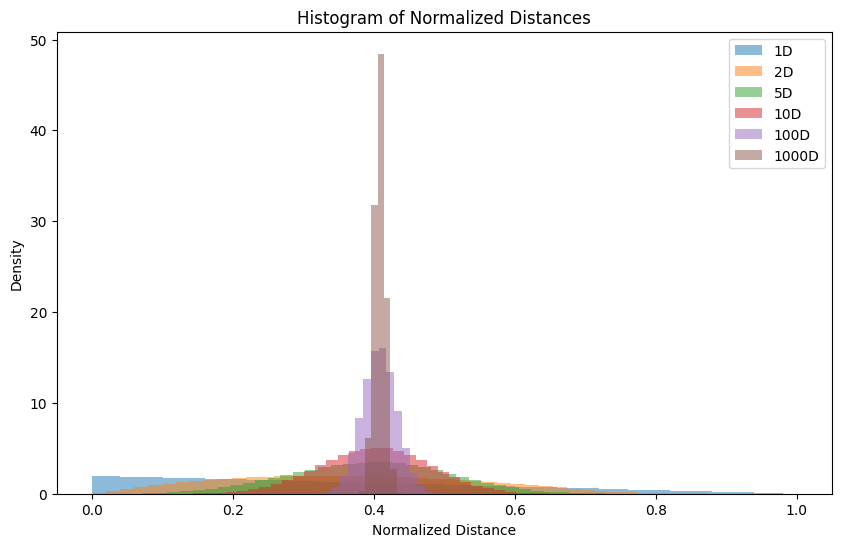

In [4]:

import matplotlib.pyplot as plt

# Flatten the matrices into 1D arrays
flattened_distances = [
    normalized_1d.ravel(),
    normalized_2d.ravel(),
    normalized_5d.ravel(),
    normalized_10d.ravel(),
    normalized_100d.ravel(),
    normalized_1000d.ravel()
]

labels = ["1D", "2D", "5D", "10D", "100D", "1000D"]

plt.figure(figsize=(10, 6))

# Plotting each histogram
for distances, label in zip(flattened_distances, labels):
    plt.hist(distances, bins=50, alpha=0.5, label=label, density=True)  # `density=True` ensures the histograms are normalized

plt.title("Histogram of Normalized Distances")
plt.xlabel("Normalized Distance")
plt.ylabel("Density")
plt.legend(loc="upper right")  # Display the labels

plt.show()









(d) Discuss what you see in the figure you made in the context of kNN. (1 pt)

As dimensions get larger, the points tend to concentrate. As this is the case, to an observer these points may seem to get farther apart. However, relative to each other, they are approximately the same distance. This means that kNN is weaker because it gets harder to discern which points are truly close and which are far, which explains the 'curse of dimensionality.'









## 2. Classifying objects in SDSS data using kNN and decision tree (6 pts)

SDSS.csv file contains various information on 150,000 stars, galaxies, and quasars, including ugriz magnitudes and redshift. Let's build kNN and DT models based on this dataset. You may want to use pandas to read in the data (https://pandas.pydata.org/).

(a) Using the provided ugriz magnitudes, compute and store u-g, g-r, r-i, i-z colors for each object. (1 pt)

In [6]:
import pandas as pd 

data = pd.read_csv('sdss/SDSS.csv')

In [ ]:
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237655107828973746,138.937318,49.779249,17.32152,16.28594,15.88471,15.66384,15.46604,2243,301,3,152,862475375345690624,GALAXY,0.028514,766,52247,131
1,1237678584114511952,31.594644,22.451246,18.13019,17.47997,16.97868,16.75768,16.83714,7709,301,3,65,2303710287351539712,QSO,1.694959,2046,53327,433
2,1237680298881122360,333.991221,19.977552,18.94798,18.80473,18.75522,18.72968,18.66552,8108,301,5,79,8532228490187264000,QSO,2.046520,7578,56956,578
3,1237650761319514319,186.201096,-2.808180,19.22969,18.04638,17.37830,16.99285,16.76479,1231,301,3,113,376103378880587776,GALAXY,0.000000,334,51993,192
4,1237648722280317126,124.814240,0.651496,18.76061,17.28682,16.74055,16.55152,16.45902,756,301,5,60,2316149895234349056,STAR,0.000196,2057,53816,632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1237673758185554973,100.889697,29.106283,19.17071,18.21106,17.80099,17.63203,17.53079,6585,301,6,121,3013004977846118400,STAR,0.000160,2676,54179,352
149996,1237671262268752282,124.964450,9.635759,19.38253,17.49415,16.55436,16.13420,15.80408,6004,301,5,61,2728125362876737536,GALAXY,0.110984,2423,54149,254
149997,1237673756573762584,98.821075,26.946457,18.90948,17.73591,17.31252,17.16612,17.07103,6585,301,3,103,3035579600630474752,STAR,0.000097,2696,54167,558
149998,1237678877782966354,320.766012,9.993010,17.63177,16.10855,15.35884,15.21912,15.11279,7777,301,6,66,821986413082863616,STAR,-0.000218,730,52466,289


In [ ]:
data['u']

0         17.32152
1         18.13019
2         18.94798
3         19.22969
4         18.76061
            ...   
149995    19.17071
149996    19.38253
149997    18.90948
149998    17.63177
149999    19.17574
Name: u, Length: 150000, dtype: float64

In [ ]:
data['class']

0         GALAXY
1            QSO
2            QSO
3         GALAXY
4           STAR
           ...  
149995      STAR
149996    GALAXY
149997      STAR
149998      STAR
149999    GALAXY
Name: class, Length: 150000, dtype: object

In [13]:
data['u-g'] = data['u'] - data['g']
data['g-r'] = data['g'] - data['r']
data['r-i'] = data['r'] - data['i']
data['i-z'] = data['i'] - data['z']


print(data.columns)





Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid',
       'u-g', 'g-r', 'r-i', 'i-z'],
      dtype='object')


(b) Make a kNN model. Vary $k$ from 1 to 30 and make a figure showing training/test accuracy vs. $k$. What is the optimal $k$ that results in the highest test accuracy? (1 pt)

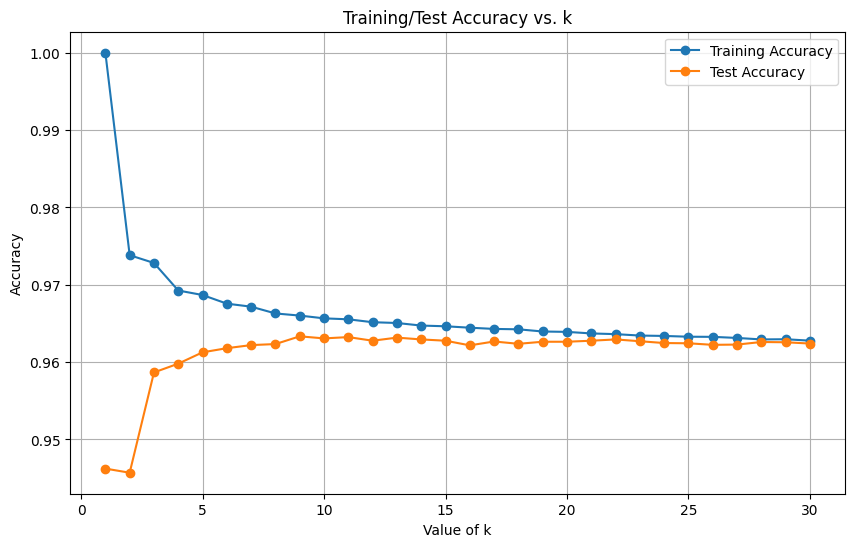

The optimal k is: 9


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load the data
data = pd.read_csv('sdss/SDSS.csv')

data['u-g'] = data['u'] - data['g']
data['g-r'] = data['g'] - data['r']
data['r-i'] = data['r'] - data['i']
data['i-z'] = data['i'] - data['z']

# Extract the colors and the target label
X = data[['u-g', 'g-r', 'r-i', 'i-z']]
y = data['class'] 

# 2. Preprocess the data
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Implement k-NN for different values of k
train_accuracies = []
test_accuracies = []

k_values = list(range(1, 31))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracies.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, knn.predict(X_test)))

# 4. Plot accuracies vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(k_values, test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.title("Training/Test Accuracy vs. k")
plt.legend()
plt.grid(True)
plt.show()

# 5. Identify the optimal k
optimal_k = k_values[test_accuracies.index(max(test_accuracies))]
print(f"The optimal k is: {optimal_k}")










(c) Make a DT model. Vary max_depth from 1 to 30 and make a figure showing training/test accuracy vs. max_depth. What is the optimal max_depth that results in the highest test accuracy? (1 pt)

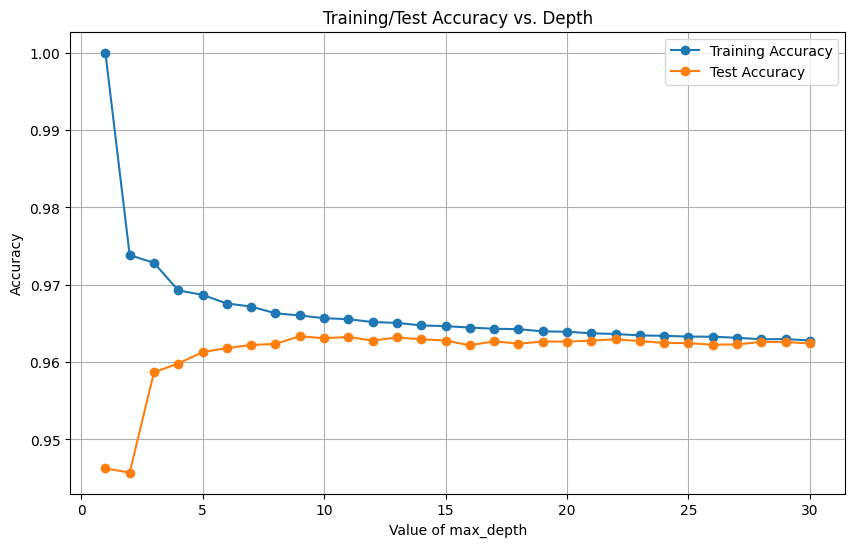

The optimal depth is: 9


In [16]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load the data
data = pd.read_csv('sdss/SDSS.csv')

data['u-g'] = data['u'] - data['g']
data['g-r'] = data['g'] - data['r']
data['r-i'] = data['r'] - data['i']
data['i-z'] = data['i'] - data['z']

# Extract the colors and the target label
X = data[['u-g', 'g-r', 'r-i', 'i-z']]
y = data['class'] 

# 2. Preprocess the data
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# implement DT with varying depths
train_accuracies_dt = []
test_accuracies_dt = []

max_depth_values = list(range(1, 31))

for max_depth in max_depth_values:
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)

    train_accuracies_dt.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracies_dt.append(accuracy_score(y_test, knn.predict(X_test)))


# 4. Plot accuracies vs. k
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(max_depth_values, test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel("Value of max_depth")
plt.ylabel("Accuracy")
plt.title("Training/Test Accuracy vs. Depth")
plt.legend()
plt.grid(True)
plt.show()

# 5. Identify the optimal k
optimal_depth = max_depth_values[test_accuracies.index(max(test_accuracies))]
print(f"The optimal depth is: {optimal_depth}")







(d) For your best decision tree model, which features are the most important? (1 pt)

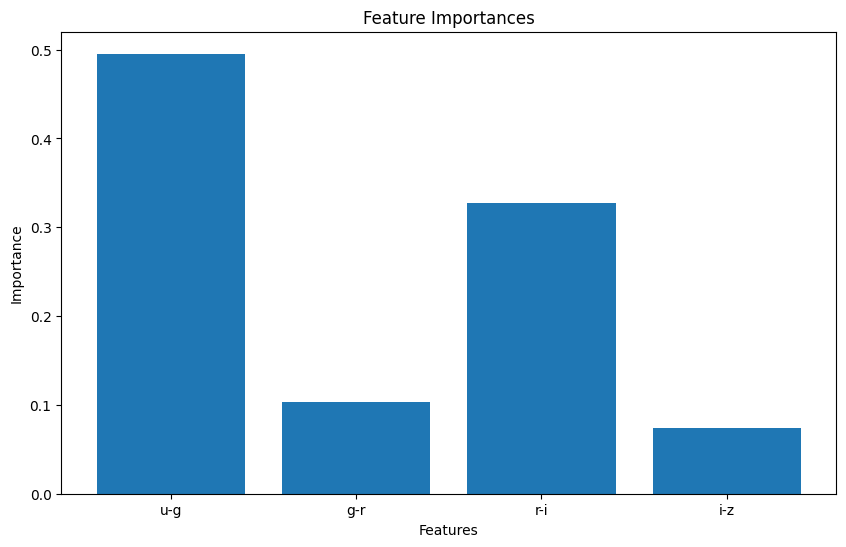

In [18]:
import matplotlib.pyplot as plt

# Assuming dt_model is your trained Decision Tree model
feature_importances = dt_model.feature_importances_

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances, align='center')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()









(e) SDSS_evaluation.csv file contains another 150,000 stars, galaxies, and quasars. Using the best kNN and decision tree models you obtained, make predictions for this new dataset and compute the accuracy. (1 pt)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load the data
data = pd.read_csv('sdss/SDSS_evaluation.csv')

data['u-g'] = data['u'] - data['g']
data['g-r'] = data['g'] - data['r']
data['r-i'] = data['r'] - data['i']
data['i-z'] = data['i'] - data['z']

# Extract the colors and the target label
X = data[['u-g', 'g-r', 'r-i', 'i-z']]
y = data['class'] 

# 2. Preprocess the data
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, knn.predict(X_train))
test_accuracy = accuracy_score(y_test, knn.predict(X_test))

print("Train accuracy at k=9:", train_accuracy)
print("Test accuracy at k=9:", test_accuracy)

dec = DecisionTreeClassifier(max_depth=9)
dec.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, dec.predict(X_train))
test_accuracy = accuracy_score(y_test, dec.predict(X_test))

print("Train accuracy at depth=9:", train_accuracy)
print("Test accuracy at depth=9:", test_accuracy)





Train accuracy at k=9: 0.8885583333333333
Test accuracy at k=9: 0.8731333333333333
Train accuracy at depth=9: 0.8734083333333333
Test accuracy at depth=9: 0.8610333333333333


(f) You should have gotten poor performance from your kNN and decision tree models unless you did some magic. Have a look at the your training/evaluation datasets and discuss what might have caused poor performace. (1 pt)

              objid             ra            dec              u  \
count  1.500000e+05  150000.000000  150000.000000  150000.000000   
mean   1.237665e+18     174.459082      23.880159      21.644338   
std    8.366967e+12      97.316018      19.663852       1.911476   
min    1.237646e+18       0.000880     -18.785328      15.075110   
25%    1.237659e+18     125.617636       4.751877      20.161220   
50%    1.237663e+18     176.486774      23.801636      21.870550   
75%    1.237668e+18     231.676173      39.796504      23.140193   
max    1.237681e+18     359.999810      83.584031      24.999840   

                   g              r              i              z  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean       20.417033      19.511881      18.999241      18.707471   
std         1.977128       1.860274       1.789266       1.808842   
min        15.001870      12.520460      11.847220      11.956510   
25%        18.719590      17.852895      1

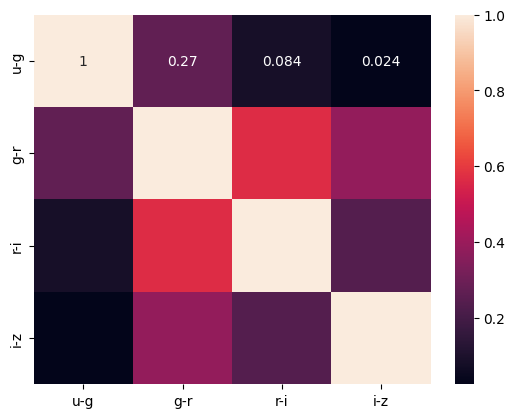

In [28]:
import seaborn as sns
print(data.describe(), "\n")
print(data['class'].value_counts())


correlation_matrix = data[['u-g', 'g-r', 'r-i', 'i-z']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()





The heatmap shows that the data was perfect at predicting itself, but nearly always failed when trying to predict any other relationship. This could be due to the fact that the further apart wavelengths discussed have no relation to each other, which would explain why u-g is approximately 25% correct at predicting g-r, because they share a wavelength.